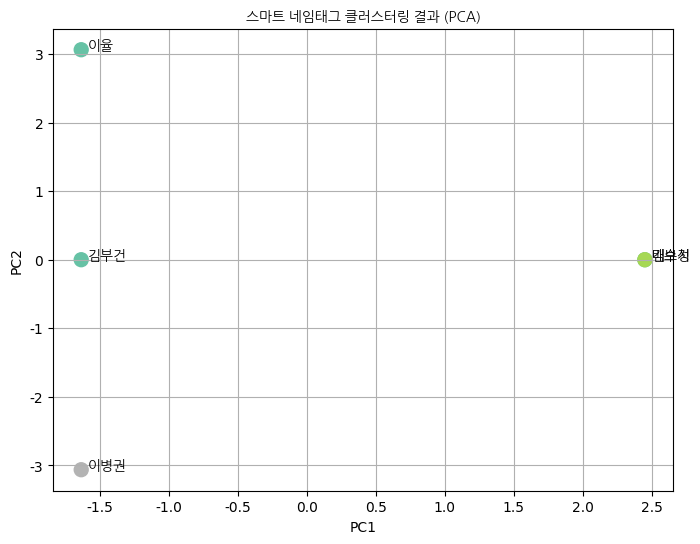

🪪 김부건 님은 '임베디드+스터디형' 그룹에 속해 있습니다.
🪪 이병권 님은 '혼합형' 그룹에 속해 있습니다.
🪪 김보성 님은 '임베디드+스터디형' 그룹에 속해 있습니다.
🪪 배수지 님은 '반도체+네트워킹형' 그룹에 속해 있습니다.
🪪 이율 님은 '임베디드+스터디형' 그룹에 속해 있습니다.


In [9]:
# ✅ 0. 한글 폰트 강제 설정
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로
fontprop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = fontprop.get_name()  # 폰트 전체 적용
mpl.rcParams['axes.unicode_minus'] = False

# ✅ 1. 필요한 라이브러리 임포트
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# ✅ 2. 구글 시트에서 데이터 불러오기
csv_url = "https://docs.google.com/spreadsheets/d/1kkt336f1G-XqfDuwCUOnqpKlxTcnwLQy-XS4SQv6lM0/export?format=csv"
df = pd.read_csv(csv_url)

# ✅ 3. 불필요한 열 제거
cols_to_drop = ['타임스탬프', '이메일 주소', '성별', '학교', '학년', '전공', '학점 (4.3기준)']
df_cleaned = df.drop(columns=cols_to_drop)

# ✅ 4. 클러스터링에 사용할 열 추출
X = df_cleaned[[
    '수강 한 전공 과목 (복수 응답 가능)',
    '관심 분야 (복수 응답 가능)',
    '참가 목적 (복수 응답 가능)'
]]

# ✅ 5. 원-핫 인코딩
X_encoded = pd.get_dummies(X)

# ✅ 6. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# ✅ 7. K-means 클러스터링 (클러스터 3개로 설정)
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# ✅ 8. 클러스터 이름 부여 (원하는대로 이름 바꿔도 됨)
cluster_name_map = {
    0: '임베디드+스터디형',
    1: '반도체+네트워킹형',
    2: '혼합형'
}
df['Group_Name'] = df['Cluster'].map(cluster_name_map)

# ✅ 9. PCA 시각화 (한글 안 깨지게 처리)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='Set2', s=100)

for i, name in enumerate(df['이름']):
    plt.text(X_pca[i, 0]+0.05, X_pca[i, 1], name, fontproperties=fontprop)

plt.title('스마트 네임태그 클러스터링 결과 (PCA)', fontproperties=fontprop)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# ✅ 10. 참가자별 안내 메시지 출력
for i, row in df.iterrows():
    print(f"🪪 {row['이름']} 님은 '{row['Group_Name']}' 그룹에 속해 있습니다.")

# ✅ 11. CSV 파일 저장
df.to_csv("clustered_results.csv", index=False)
